In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [ ]:
df = pd.read_csv("/content/data/house_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage         259
GarageYrBlt          81
MasVnrArea            8
Id                    0
BsmtExposure_Av       0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtCond_TA           0
BsmtFinType1_Rec      0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtFinType1_LwQ      0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# SalePrice와 상관관계를 상위 10개 보여주게 함
# 이 중에서 feature를 고르려고
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort['SalePrice'].head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd']

In [ ]:
a = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]

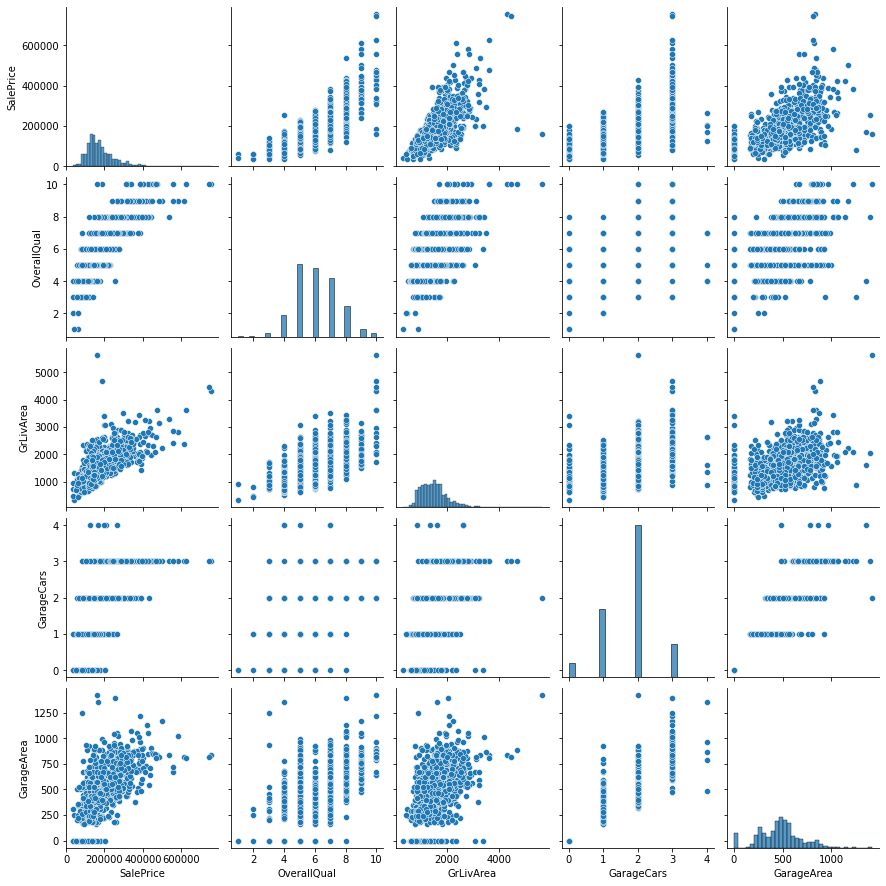

In [ ]:
sns.pairplot(a)

In [ ]:
cols_train = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [ ]:
X_train_pre = df[cols_train]
y = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath ='Ch15-house.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=0, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25,
                    epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 4s 15ms/step - loss: 17798049792.0000 - val_loss: 8628808704.0000
Epoch 2/2000
28/28 [==============================] - 0s 8ms/step - loss: 3432687104.0000 - val_loss: 72610960.0000
Epoch 3/2000
28/28 [==============================] - 0s 8ms/step - loss: 48509296.0000 - val_loss: 25518396.0000
Epoch 4/2000
28/28 [==============================] - 0s 8ms/step - loss: 4764080.0000 - val_loss: 2124026.2500
Epoch 5/2000
28/28 [==============================] - 0s 8ms/step - loss: 442310.2812 - val_loss: 253262.5156
Epoch 6/2000
28/28 [==============================] - 0s 6ms/step - loss: 123605.6562 - val_loss: 146129.8125
Epoch 7/2000
28/28 [==============================] - 0s 8ms/step - loss: 101950.1562 - val_loss: 139864.8281
Epoch 8/2000
28/28 [==============================] - 0s 6ms/step - loss: 99486.7578 - val_loss: 140021.3750
Epoch 9/2000
28/28 [==============================] - 0s 7ms/step - loss: 99370.0547 - val_loss: 14

In [ ]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()

for i in range(25):
  real = y_test[i]
  pred = Y_prediction[i]
  print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, pred))

  real_prices.append(real)
  pred_prices.append(pred)
  n_iter = n_iter + 1
  X_num.append(n_iter)

실제가격: 91000.00, 예상가격: 91001.95
실제가격: 175000.00, 예상가격: 175003.44
실제가격: 374000.00, 예상가격: 374007.22
실제가격: 315000.00, 예상가격: 315007.69
실제가격: 119000.00, 예상가격: 118996.95
실제가격: 145000.00, 예상가격: 145009.42
실제가격: 189000.00, 예상가격: 189005.53
실제가격: 157500.00, 예상가격: 157508.53
실제가격: 221500.00, 예상가격: 221517.55
실제가격: 129500.00, 예상가격: 129509.69
실제가격: 154000.00, 예상가격: 154008.30
실제가격: 149000.00, 예상가격: 149000.11
실제가격: 158000.00, 예상가격: 158000.78
실제가격: 159950.00, 예상가격: 159956.33
실제가격: 132500.00, 예상가격: 132512.73
실제가격: 280000.00, 예상가격: 280014.06
실제가격: 192000.00, 예상가격: 192008.67
실제가격: 190000.00, 예상가격: 190011.12
실제가격: 185850.00, 예상가격: 185855.11
실제가격: 134000.00, 예상가격: 134002.88
실제가격: 145500.00, 예상가격: 145500.92
실제가격: 320000.00, 예상가격: 320008.69
실제가격: 185750.00, 예상가격: 185755.27
실제가격: 118964.00, 예상가격: 118972.73
실제가격: 140000.00, 예상가격: 140018.09


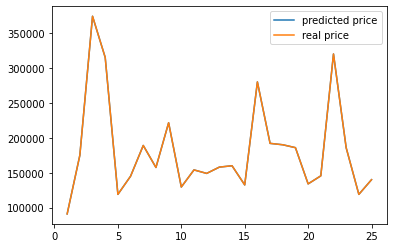

In [ ]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.legend()
plt.show()

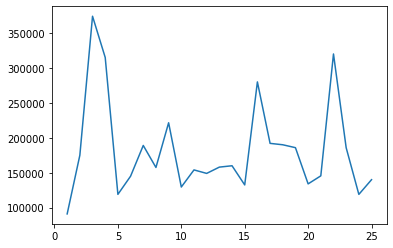

In [ ]:
plt.plot(X_num, real_prices, label='real price')